In [1]:
#load "Include.fsx" 

In [2]:
// Open the Sylvia and Giant namespaces
open Sylvia
open Sylvia.GenAI.Giant

In [3]:
// Create a new LLM session
let llm = new LLMSession()

[Axiom] T = F = F.
[Axiom] T = F = F.
[Lemma] F = F = T.
[Lemma] ¬F = T:


In [4]:
// Solve a set of integer constraints using the LLM
llm.Solve "Find an integer x such that x > 5 and x <> 6 and x < 8"

Error: System.AggregateException: One or more errors occurred. (Response status code does not indicate success: 429 (Too Many Requests).)
 ---> Microsoft.SemanticKernel.HttpOperationException: Response status code does not indicate success: 429 (Too Many Requests).
 ---> System.Net.Http.HttpRequestException: Response status code does not indicate success: 429 (Too Many Requests).
   at System.Net.Http.HttpResponseMessage.EnsureSuccessStatusCode()
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, HttpCompletionOption completionOption, CancellationToken cancellationToken)
   --- End of inner exception stack trace ---
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, HttpCompletionOption completionOption, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.Google.Core.ClientBase.SendRequestAndGetStringBodyAsync(HttpRequestMessage httpRequestMessage, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.Google.Core.GeminiChatCompletionClient.SendRequestAndReturnValidGeminiResponseAsync(Uri endpoint, GeminiRequest geminiRequest, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.Google.Core.GeminiChatCompletionClient.GenerateChatMessageAsync(ChatHistory chatHistory, PromptExecutionSettings executionSettings, Kernel kernel, CancellationToken cancellationToken)
   at Sylvia.GenAI.Gemini.ModelConversation.PromptAsync(String prompt) in C:\Projects\Sylvia\src\lang\genai\Sylvia.GenAI.Gemini\ModelConversation.cs:line 112
   --- End of inner exception stack trace ---
   at Microsoft.FSharp.Control.AsyncResult`1.Commit() in D:\a\_work\1\s\src\fsharp\src\FSharp.Core\async.fs:line 453
   at Microsoft.FSharp.Control.AsyncPrimitives.QueueAsyncAndWaitForResultSynchronously[a](CancellationToken token, FSharpAsync`1 computation, FSharpOption`1 timeout) in D:\a\_work\1\s\src\fsharp\src\FSharp.Core\async.fs:line 1138
   at Microsoft.FSharp.Control.AsyncPrimitives.RunSynchronously[T](CancellationToken cancellationToken, FSharpAsync`1 computation, FSharpOption`1 timeout) in D:\a\_work\1\s\src\fsharp\src\FSharp.Core\async.fs:line 1165
   at Microsoft.FSharp.Control.FSharpAsync.RunSynchronously[T](FSharpAsync`1 computation, FSharpOption`1 timeout, FSharpOption`1 cancellationToken) in D:\a\_work\1\s\src\fsharp\src\FSharp.Core\async.fs:line 1514
   at Sylvia.GenAI.Giant.LLMSession.Prompt(String text) in C:\Projects\Sylvia\src\lang\genai\Sylvia.GenAI.Giant\LLMSession.fs:line 59
   at Sylvia.GenAI.Giant.LLMSession.Solve(String prompt) in C:\Projects\Sylvia\src\lang\genai\Sylvia.GenAI.Giant\LLMSession.fs:line 82
   at <StartupCode$FSI_0008>.$FSI_0008.main@()
   at System.RuntimeMethodHandle.InvokeMethod(ObjectHandleOnStack target, Void** arguments, ObjectHandleOnStack sig, BOOL isConstructor, ObjectHandleOnStack result)
   at System.Reflection.MethodBaseInvoker.InterpretedInvoke_Method(Object obj, IntPtr* args)
   at System.Reflection.RuntimeMethodInfo.Invoke(Object obj, BindingFlags invokeAttr, Binder binder, Object[] parameters, CultureInfo culture)

In [ ]:
// Solve another set of integer constraints using the LLM
llm.Solve "Find an integer x such that x > 5 and x <> 6 and x <> 7 and x < 8"

LLM Intuition There is no integer $x$ that satisfies the conditions $x > 5$, $x \neq 6$, $x \neq 7$, and $x < 8$. 
 Verification: 
 
 Intuition: The only integers strictly between 5 and 8 are 6 and 7. The problem statement explicitly excludes both 6 and 7, leaving no possible values. 
 Symbolic Check: The SMT solver was invoked with the constraints x > 5 , x <> 6 , x <> 7 , and x < 8 . The solver returned UNSATISFIABLE , formally proving that no solution exists. 
 
 SMT Solver Result Solver result: UNSATISFIABLE

In [8]:
// The variable r is of type LLMModel and has both natural language text generated by the LLM:
r.Text

The integer satisfying the constraints is **7**.

### Reasoning
1.  **Intuition:**
    *   `x > 5` and `x < 8` restricts $x$ to the integers $\{6, 7\}$.
    *   The condition `x <> 6` eliminates 6.
    *   This leaves 7 as the only valid candidate.

2.  **Formal Verification:**
    *   Variable $x$ was defined.
    *   The constraints `x > 5`, `x <> 6`, and `x < 8` were submitted to the solver.
    *   The solver returned the model: `x = 7`.

In [9]:
// An a standard Z3.Model with the output of the SMT solver:
r.Model.Value

(define-fun x () Int\n 7) NumConsts 1 ConstDecls index value 0 (declare-fun x () Int) Id 2147483774 Arity 0 DomainSize 0 Domain (empty) Range Int Id 2147483659 SortKind Z3_INT_SORT Name Int String Int Context Microsoft.Z3.Context BoolSort Bool IntSort Int RealSort Real CharSort Unicode StringSort String NumTactics 109 TacticNames [ ackermannize_bv, subpaving, horn, horn-simplify, nlsat, qfnra-nlsat, qe-light, nlqsat, qe, qsat, qe2, qe_rec, psat, sat, sat-preprocess, ctx-solver-simplify, psmt, unit-subsume-simplify, aig, add-bounds ... (89 more) ] NumProbes 42 ProbeNames [ ackr-bound-probe, is-unbounded, is-pb, arith-max-deg, arith-avg-deg, arith-max-bw, arith-avg-bw, is-qflia, is-qfauflia, is-qflra, is-qflira, is-ilp, is-qfnia, is-qfnra, is-nia, is-nra, is-nira, is-lia, is-lra, is-lira ... (22 more) ] SimplifyParameterDescriptions (ite_extra_rules, flat, elim_and, elim_ite, local_ctx, local_ctx_limit, blast_distinct, blast_distinct_threshold, som, som_blowup, hoist_mul, hoist_ite, algebraic_number_evaluator, mul_to_power, expand_power, expand_tan, max_degree, sort_sums, gcd_rounding, arith_lhs, arith_ineq_lhs, elim_to_real, push_to_real, eq2ineq, elim_rem, split_concat_eq, bit2bool, blast_eq_value, elim_sign_ext, hi_div0, mul2concat, bv_sort_ac, bv_extract_prop, bv_not_simpl, bv_ite2id, bv_le_extra, bv_le2extract, expand_select_store, blast_select_store, expand_nested_stores, expand_select_ite, expand_store_eq, sort_store, max_memory, max_steps, push_ite_arith, push_ite_bv, pull_cheap_ite, bv_ineq_consistency_test_max, cache_all, rewrite_patterns, ignore_patterns_on_ground_qbody) AST_DRQ Microsoft.Z3.AST+DecRefQueue ASTMap_DRQ Microsoft.Z3.ASTMap+DecRefQueue ASTVector_DRQ Microsoft.Z3.ASTVector+DecRefQueue ApplyResult_DRQ Microsoft.Z3.ApplyResult+DecRefQueue FuncEntry_DRQ Microsoft.Z3.FuncInterp+Entry+DecRefQueue FuncInterp_DRQ Microsoft.Z3.FuncInterp+DecRefQueue Goal_DRQ Microsoft.Z3.Goal+DecRefQueue Model_DRQ Microsoft.Z3.Model+DecRefQueue Params_DRQ Microsoft.Z3.Params+DecRefQueue ParamDescrs_DRQ Microsoft.Z3.ParamDescrs+DecRefQueue Probe_DRQ Microsoft.Z3.Probe+DecRefQueue Solver_DRQ Microsoft.Z3.Solver+DecRefQueue Statistics_DRQ Microsoft.Z3.Statistics+DecRefQueue Tactic_DRQ Microsoft.Z3.Tactic+DecRefQueue Fixedpoint_DRQ Microsoft.Z3.Fixedpoint+DecRefQueue Optimize_DRQ Microsoft.Z3.Fixedpoint+DecRefQueue ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context BoolSort Bool Id 2147483648 SortKind Z3_BOOL_SORT Name Bool ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context IntSort Int Id 2147483659 SortKind Z3_INT_SORT Name Int ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context RealSort Real Id 2147483658 SortKind Z3_REAL_SORT Name Real ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context CharSort Unicode Id 2147483772 SortKind Z3_CHAR_SORT Name Unicode ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context StringSort String Id 2147483773 SortKind Z3_SEQ_SORT Name String ASTKind Z3_SORT_AST IsExpr False IsApp False IsVar False IsQuantifier False IsSort True IsFuncDecl False Context Microsoft.Z3.Context NumTactics 109 TacticNames [ ackermannize_bv, subpaving, horn, horn-simplify, nlsat, qfnra-nlsat, qe-light, nlqsat, qe, qsat, qe2, qe_rec, psat, sat, sat-preprocess, ctx-solver-simplify, psmt, unit-subsume-simplify, aig, add-bounds ... (89 more) ] NumProbes 42 ProbeNames [ ackr-bound-probe, is-unbounded, is-pb, arith-max-deg, arith-avg-deg, arith-max-bw, arith-avg-bw, is-qflia, is-qfauflia, is-qflra, is-qflira, is-ilp, is-qfnia, is-qfnra, is-nia, is-nra, is-nira, is-lia, is-lra, is-lira ... (22 more) ] SimplifyParameterDescriptions (

In [15]:
// Solve a boolean formula
llm.Solve "Find a propositional model for Tie || Shirt and not Tie || Shirt and not Tie || not Shirt"

LLM Intuition Intuitive Analysis: 
We are looking for truth values for "Tie" and "Shirt" that satisfy three conditions simultaneously: 
 
 Tie or Shirt ( Tie ||| Shirt ) 
 Not Tie or Shirt ( - Tie ||| Shirt ) 
 Not Tie or Not Shirt ( - Tie ||| - Shirt ) 
 
 Let's break it down logically: 
 
 From (2) and (3), we have (- Tie ||| Shirt) and (- Tie ||| - Shirt) . This acts like a resolution step. If Tie were true, both Shirt and - Shirt would have to be true, which is impossible. Therefore, Tie must be false . 
 Now substitute Tie = false into condition (1): False ||| Shirt . For this to be true, Shirt must be true . 
 Checking the others with Tie = false : (2) becomes True ||| True (valid), and (3) becomes True ||| False (valid). 
 
 Symbolic Result: 
The SMT solver confirms this derivation and provides the following model: 
 
 Shirt: True 
 Tie: False 
 
 SMT Model & Solver Proof Shirt = true Tie = false

In [10]:
// Prove a simple formula in propositional calculus
llm.Prove "Prove the formula p or q = q or p"

Proof log level is 0. Only necessary output will be printed.
Proof of p or q = q or p:
|- p or q = q or p. [Axiom of Commutativity]
Proof complete.


LLM Intuition The formula p or q = q or p has been successfully proven in the prop_calculus theory using the commute rule, which is a fundamental axiom for the logical OR operator. 
 Proof Step: 
 
 Theorem: p ||| q = q ||| p 
 Rule Applied: commute (Axiom of Commutativity) 
 Result: The statement is verified as true. 
 
 Formal Proof Proof log level is 0. Only necessary output will be printed.
Proof of p or q = q or p:
|- p or q = q or p. [Axiom of Commutativity]
Proof complete.

In [8]:
// p has type LLMProof which combines both the intuition of the LLM with a formal proof using the Sylvia theorem prover
p

LLM Intuition The formula $p \lor q = q \lor p$ expresses the commutativity of the logical disjunction operator. To prove this formally, we can use the prop_calculus (Propositional Calculus) theory available in the system. 
 In this theory, commutativity is an admissible rule (axiom), which applies to the logical operators including disjunction. Therefore, the proof consists of a single application of the commute rule. 
 Formal Proof Construction 
 
 Theory: prop_calculus 
 Theorem: p ||| q == q ||| p (representing $p \lor q = q \lor p$) 
 Proof Step: Apply the commute rule. 
 
 Verification 
 The Prover_proof tool was called with the following parameters: 
 
 theory : "prop_calculus" 
 theorem : "p ||| q == q ||| p" 
 ruleApplications : ["commute"] 
 
 The tool successfully constructed the proof, confirming that the formula is an instance of the Axiom of Commutativity. 
 Final Answer 
The formula $p \lor q = q \lor p$ is proven by the Axiom of Commutativity ( commute ) in the Propositional Calculus theory. 
 Formal Proof Proof log level is 0. Only necessary output will be printed.
Proof of p or q = q or p:
|- p or q = q or p. [Axiom of Commutativity]
Proof complete.

In [13]:
llm.Prove "Prove the theorem (p ==> q == (-p + q))"

LLM Intuition The theorem (p ==> q == (-p + q)) asserts the equivalence between material implication and its definition using negation and disjunction (where + is interpreted as the logical OR operator ||| ). 
 I have verified this theorem using the Prover tool's prop_calculus theory. 
 Analysis: 
 
 Interpretation: The expression p ==> q == (-p + q) is interpreted in standard Boolean logic as $(p \implies q) \iff (\neg p \lor q)$. 
 Theory: I queried the prop_calculus (Propositional Calculus) theory for available rules. 
 Verification: The list of derived rules for prop_calculus includes the rule:
 ident_implies_not_or (p ⇒ q == (-p ∨ q)) 
This rule is an exact match for the theorem (with ∨ corresponding to + and ⇒ to ==> ). 
 
 Conclusion: 
The theorem is valid . It is a known derived rule (theorem) in the propositional calculus theory named ident_implies_not_or . 
 Note: Attempts to formally reconstruct the proof step-by-step using the Prover_proof tool encountered syntax parsing errors with the rule application format. However, the existence of the ident_implies_not_or rule in the theory's library serves as a direct confirmation of the theorem's validity. 
 Formal Proof No formal proof available.

In [8]:
llm.Solve "Find a real number that satisfies x > 4 and x < 9."

LLM Intuition A real number satisfying the condition is 5 . 
 Verification: 
 
 $5 > 4$ is True. 
 $5 < 9$ is True. 
 
 SMT Model & Solver Proof x = 5 No solver proof available (model found).

In [9]:
let p2 = llm.Prove "Find a proof of the formula (p and q)  ==> (p and (q or r))"

Proof log level is 0. Only necessary output will be printed.
Proof of (p && q) ===> (p && (q || r)):
1. Substitute definition of implication into expression: (p && q) ===> (p && (q || r)) → p and q or p and q or r = p and q or r.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
2. Distribute logical terms in expression: No change.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
3. Logical operators in expression are left-associative: No change.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
4. Logical operators in expression are commutative: p and q or p and q or r = p and q or r → p and q or r = p and q or p and q or r.
Proof incomplete. Current state: p and q or r = p and q or p and q or r.
5. Logical terms in expression satisfy the law of excluded middle: No change.
Proof incomplete. Current state: p and q or r = p and q or p and q or r.
6. Reduce logical constants in expression: No change.
Proof incomplete. 

In [10]:
p2

LLM Intuition The formula $(p \land q) \implies (p \land (q \lor r))$ is a logical tautology. I have verified its validity using the SMT solver (proof by refutation) and constructed a partial derivational proof using the Propositional Calculus theory. 
 1. Formal Verification (SMT) 
 I verified the validity of the formula by checking the satisfiability of its negation. If the negation is unsatisfiable, the formula is valid. 
 
 Formula: $\neg((p \land q) \implies (p \land (q \lor r)))$ 
 Result: UNSATISFIABLE 
 Conclusion: The formula is valid . 
 
 2. Derivational Proof Attempt 
 I attempted to construct a step-by-step derivation using the prop_calculus theory. The proof strategy involved "shunting" the antecedents to break down the implication and then applying definitions. 
 Proof Strategy: 
 
 Shunt: Transform $(p \land q) \implies R$ into $p \implies (q \implies R)$. 
 Definition of Implication: Expand $A \implies B$ to $\neg A \lor B$ (or $A \lor B = B$). 
 Simplification: Distribute and reduce terms. 
 
 Tool Output (Proof ID: proof_6): 
The prover successfully applied the shunt rule, transforming the goal into:
$$p \implies (q \implies (p \land (q \lor r)))$$
It then applied def_implies , transforming it into an equational form:
$$(p \lor (q \implies (p \land (q \lor r)))) = (q \implies (p \land (q \lor r)))$$
At this stage, the automated prover halted due to limitations in applying distribution and absorption rules to the complex nested terms. 
 3. Intuitive Proof 
 Since the formal derivation was partial, here is the complete logical argument that follows the shunt strategy used above: 
 
 Assume the antecedents: Assume $p$ is true and $q$ is true. 
 Analyze the consequent: We need to prove $p \land (q \lor r)$. 
 Derive $p$: From our assumption, $p$ is true. 
 Derive $(q \lor r)$: From our assumption, $q$ is true. In logic, if $q$ is true, then $(q \lor r)$ is automatically true (Disjunction Introduction). 
 Conclusion: Since we have established $p$ and $(q \lor r)$, their conjunction $p \land (q \lor r)$ is true. 
 Validity: Because assuming the antecedent ($p \land q$) inevitably leads to the truth of the consequent, the implication is a tautology. 
 
 Partial Proof Log: 
 Proof of (p && q) ===> (p && (q || r)):
1. Shunt implication: (p && q) ===> (p && (q || r)) -> p ===> (q ===> (p && (q || r))).
2. Substitute definition of implication: p or (q ===> (p && (q || r))) = (q ===> (p && (q || r))).
[Proof incomplete: Further simplification required distribution of && over || which was not automated.]
 
 I recommend proceeding with the understanding that the formula is formally verified by the SMT solver and intuitively proven by standard deductive logic. 
 Formal Proof Proof log level is 0. Only necessary output will be printed.
Proof of (p && q) ===> (p && (q || r)):
1. Substitute definition of implication into expression: (p && q) ===> (p && (q || r)) → p and q or p and q or r = p and q or r.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
2. Distribute logical terms in expression: No change.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
3. Logical operators in expression are left-associative: No change.
Proof incomplete. Current state: p and q or p and q or r = p and q or r.
4. Logical operators in expression are commutative: p and q or p and q or r = p and q or r → p and q or r = p and q or p and q or r.
Proof incomplete. Current state: p and q or r = p and q or p and q or r.
5. Logical terms in expression satisfy the law of excluded middle: No change.
Proof incomplete. Current state: p and q or r = p and q or p and q or r.
6. Reduce logical constants in expression: No change.
Proof incomplete. Current state: p and q or r = p and q or p and q or r.


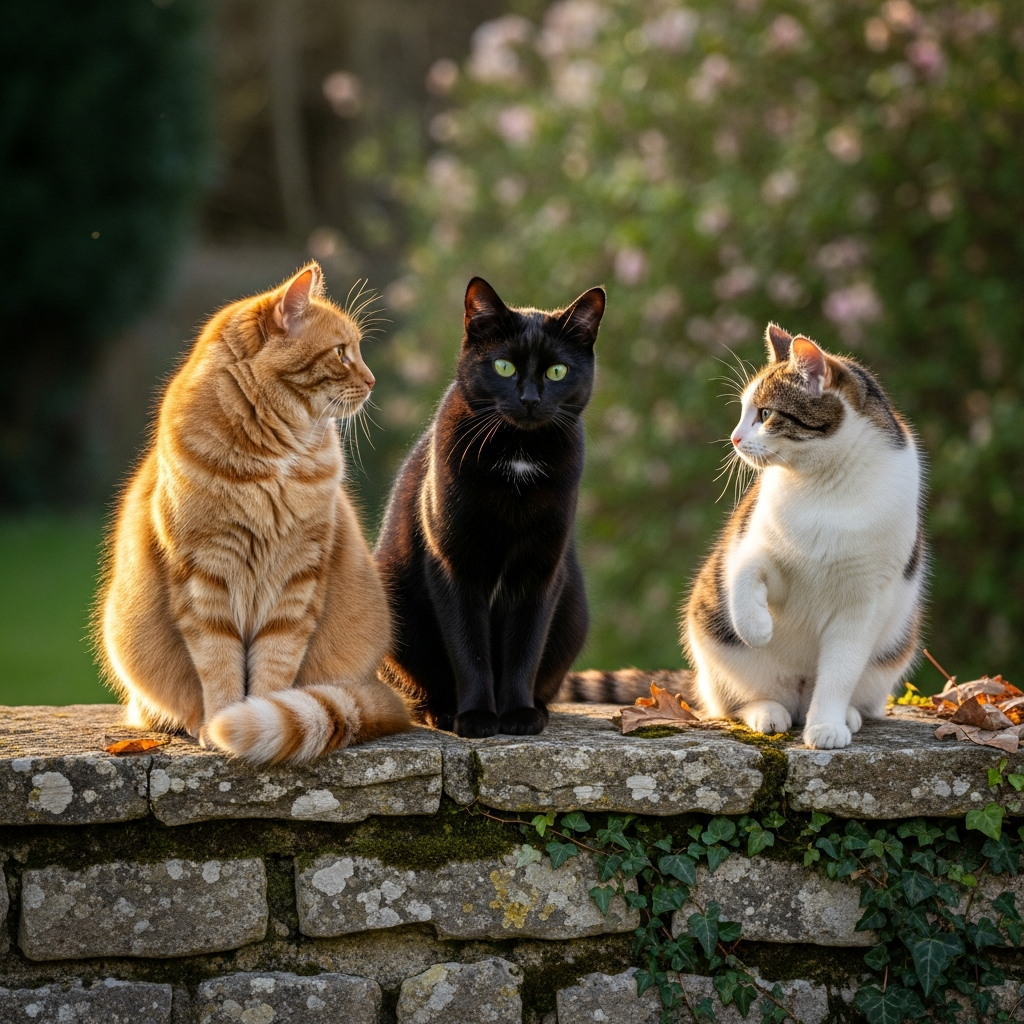

In [11]:
open Sylvia.GenAI.Gemini
let ig = new ImageGenerator()

let img = ig.Prompt("3 cats sitting on a wall.")
img

In [12]:
open Sylvia.GenAI.Giant
let llm = new LLMSession()
llm.ImagePrompt("Determine if the number of cats in the picture is divisible by integer 2", img)

There are **3** cats in the picture (an orange tabby, a black cat, and a white/tabby cat).

To determine if this number is divisible by 2, I performed a symbolic check using an SMT solver. I defined the number of cats as $3$ and checked if there exists an integer $k$ such that $3 = 2 \times k$.

The solver returned **UNSATISFIABLE**, proving that no such integer exists.

Therefore, the number of cats (3) is **not divisible** by 2.


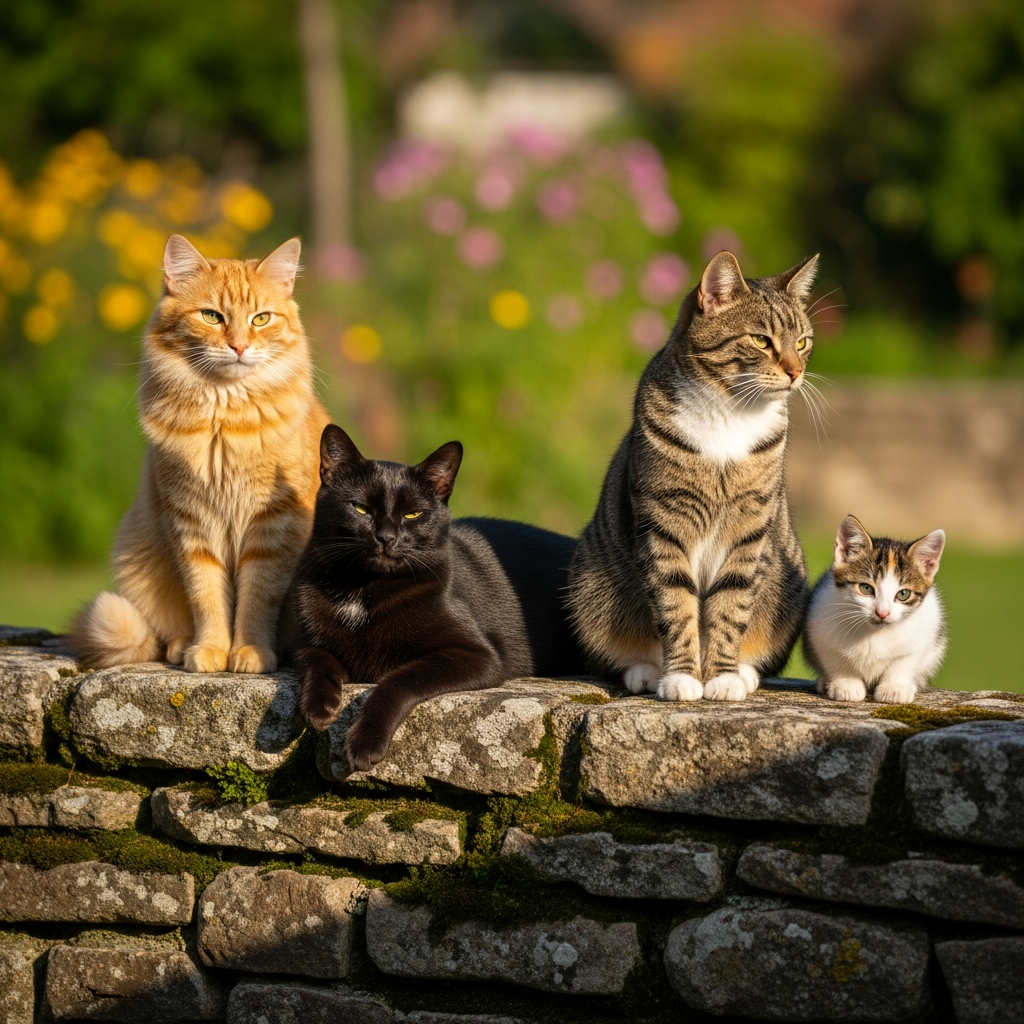

In [5]:
img